In [17]:
import cv2 # pip install opencv-python

In [18]:
import matplotlib.pyplot as plt # pip install matplotlib

In [19]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [20]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [21]:
classLabels = [] ## empty list of python
file_name = 'C:/Users/fmlyj/Documents/Object Detection using openCV/Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read()) 

In [22]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [23]:
print(len(classLabels))

80


In [24]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000269750EBF10>

## read an image

In [25]:
img = cv2.imread('C:/Users/fmlyj/Documents/Object Detection using openCV/bicycle.jpg')

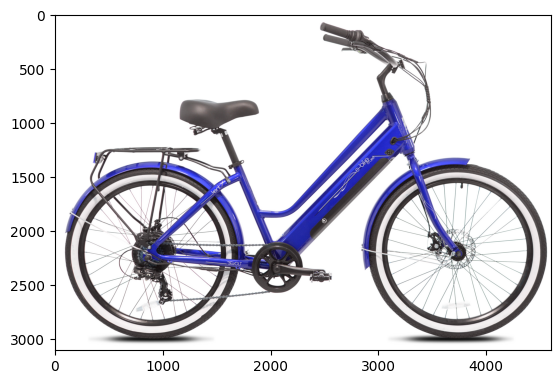

In [26]:
plt.imshow(img)

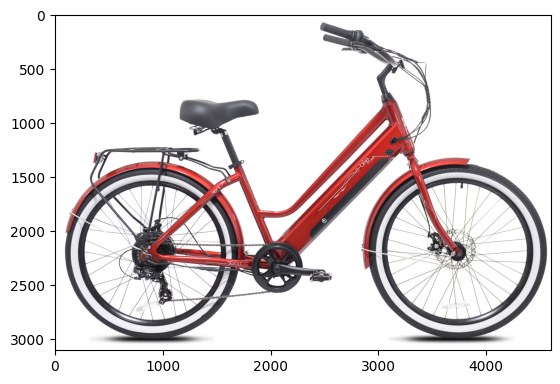

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [28]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [29]:
print(ClassIndex)

[2]


In [30]:
font_scale = 10
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0),thickness=10)

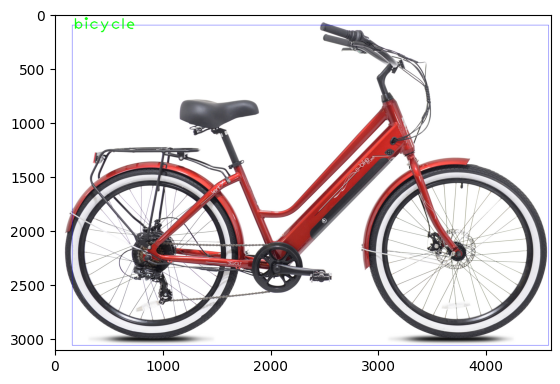

In [31]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Video Demo

In [32]:
cap = cv2.VideoCapture("C:/Users/fmlyj/Documents/Object Detection using openCV/Road traffic video for object detection.mp4")

# check if the video opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)  
    if not cap.isOpened():
        raise IOError("Cannot open video")

font_scale = 4
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)

    print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            cv2.rectangle(frame, boxes, (255, 0, 0), 2)
            cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0),thickness=4)

    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[3 3 8 3 3 3 7]
[3 3 3 8 3 3 7]
[3 3 3 3 7 8 7]
[3 3 3 8 3 3 7]
[3 3 8 3 7]
[3 3 7 8 3 3]
[3 3 3 3 3 8 7]
[3 3 3 8 3 3 7]
[3 3 3 3 8 3 7 3]
[3 3 3 3 3 8 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3 3 3 8]
[3 3 3 3]
[3 3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3 3]
[3 3 8 3 3]
[3 3 3 3]
[3 3 8 6 3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3 3 3]
[3 3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3 3 7]
[3 3 3 7 3]
[3 3 7 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3 8]
[3 3 3]
[3 3 3 3 7]
[3 3 3 8 3 3 6 7]
[3 3 8 3 3 3 7]
[3 3 3 3 8 3 3 3]
[3 8 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 6 3]
[3 3 3 6 3 3 3]
[3 3 3 3 6 3]
[3 3 3 3 6 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3 3 6]
[6 3 3 3 3 3 3]
[6 3 3 3 9 3 3]
[6 6 3 3 3 3 3]
[6 3 3 3 3 3 6 3]
[3 6 3 3 3 3 6]
[3 6 3 3 3 6 3]
[6 3 3 3 3 3]
[3 6 3 3 3 3 3]
[3 3 3 3 3 6 8]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3

KeyboardInterrupt: 